In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import opinion_lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [2]:
# Load the cleaned datasets
reviews = pd.read_parquet('data/review_Cell_Phones_and_Accessories.parquet')
metadata = pd.read_parquet('data/metadata_Cell_Phones_and_Accessories.parquet')

# Merge the datasets on 'asin' and 'parent_asin'
merged_data = pd.merge(reviews, metadata, on=['parent_asin'], how='inner')

In [5]:
merged_data

,rating,title_x,text,asin,parent_asin,timestamp,helpful_vote,verified_purchase,main_category,title_y,...,rating_number,features,description,price,store,categories,details,bought_together,subtitle,author
0,4.0,Decent,Lasted about 9 months then the lock button bro...,B07XRDHDNQ,B07XRDHDNQ,1590470082910,0,True,Amazon Home,TORRAS COOLIFY Zone 7 Midnight Green,...,2725,[[Ultra-Thin yet Protective]: iPhone 11 pro sl...,[],None,TORRAS,"[Cell Phones & Accessories, Cases, Holsters & ...","{""Product Dimensions"": ""6.93 x 3.78 x 0.63 inc...",None,None,None
1,5.0,Same green as iPhone 11pro,The case is a lovely green iridescent color th...,B07XRDHDNQ,B07XRDHDNQ,1584201027802,0,True,Amazon Home,TORRAS COOLIFY Zone 7 Midnight Green,...,2725,[[Ultra-Thin yet Protective]: iPhone 11 pro sl...,[],None,TORRAS,"[Cell Phones & Accessories, Cases, Holsters & ...","{""Product Dimensions"": ""6.93 x 3.78 x 0.63 inc...",None,None,None
2,5.0,Must buy for a sleek and simple look.,Product fits great and looks great. Offers dec...,B07XRDHDNQ,B07XRDHDNQ,1578858495171,0,True,Amazon Home,TORRAS COOLIFY Zone 7 Midnight Green,...,2725,[[Ultra-Thin yet Protective]: iPhone 11 pro sl...,[],None,TORRAS,"[Cell Phones & Accessories, Cases, Holsters & ...","{""Product Dimensions"": ""6.93 x 3.78 x 0.63 inc...",None,None,None
3,2.0,Poor quality,Color is fading after 3 month and coming small...,B07XRDHDNQ,B07XRDHDNQ,1596947362802,0,True,Amazon Home,TORRAS COOLIFY Zone 7 Midnight Green,...,2725,[[Ultra-Thin yet Protective]: iPhone 11 pro sl...,[],None,TORRAS,"[Cell Phones & Accessories, Cases, Holsters & ...","{""Product Dimensions"": ""6.93 x 3.78 x 0.63 inc...",None,None,None
4,3.0,Midnight green paint chips very easily,I had a Torras slim case for my iPhone XS whic...,B07XRDHDNQ,B07XRDHDNQ,1583709758238,0,True,Amazon Home,TORRAS COOLIFY Zone 7 Midnight Green,...,2725,[[Ultra-Thin yet Protective]: iPhone 11 pro sl...,[],None,TORRAS,"[Cell Phones & Accessories, Cases, Holsters & ...","{""Product Dimensions"": ""6.93 x 3.78 x 0.63 inc...",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742491,1.0,Doesn’t charge,After it wouldn’t charge my phone (with a case...,B0BR7WCT34,B0BR7WCT34,1683088615757,0,True,Industrial & Scientific,KPON Travel Charger for iPhone and Apple Watch...,...,86,[【Travel Wireless Charger】This 3 in 1 wireless...,[],None,KPON,"[Cell Phones & Accessories, Accessories, Smart...","{""Package Dimensions"": ""7.44 x 3.58 x 0.75 inc...",None,None,None
2742492,5.0,So nice,It is a compact and usefull thing.,B0B8ZQ4VJ4,B0B8ZQ4VJ4,1675207523649,0,True,All Electronics,"35W Dual Charger for iPhone, MacBook Air, iPad...",...,65,[35W Fast Charger: Charging iPhone 14 Pro Max ...,[],None,IFEART,"[Cell Phones & Accessories, Accessories, Charg...","{""Product Dimensions"": ""2.01 x 0.83 x 2.05 inc...",None,None,None
2742493,5.0,Superb quality.. great product,Great quality . 5 stars!!!,B0B2D33R45,B0B2D33R45,1661134284407,0,True,Cell Phones & Accessories,"GBEAST Phone Mount for Car, Vent Car Phone Hol...",...,41,[Enjoy the Comfort of Never Blocking: The car ...,[],None,GBEAST,"[Cell Phones & Accessories, Accessories, Autom...","{""Product Dimensions"": ""2.56 x 4.92 x 5.12 inc...",None,None,None
2742494,1.0,Buyers beware!,It is cheaply made and takes forever to charge...,B0B68XS37Y,B0B68XS37Y,1678652930056,0,True,All Electronics,Lopnord 3 in 1 Charging Station for Multiple D...,...,44,[🔋【3 IN 1 CHARGER STATION】Lopnord Charging sta...,[],25.99,Lopnord,"[Cell Phones & Accessories, Accessories, Charg...","{""Package Dimensions"": ""7.32 x 4.65 x 2.68 inc...",None,None,None


# Amazon rating

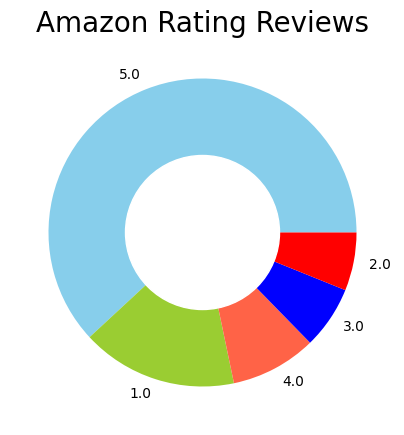

In [3]:
ratings = merged_data["rating"].value_counts()
number = ratings.index
quantity = ratings.values 

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=number, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Amazon Rating Reviews", fontsize=20)
plt.show()

# Sentiment distribution for all the reviews

In [3]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """Analyze sentiment of the given text."""
    scores = sid.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to the review text
merged_data['sentiment_score'] = merged_data['text'].apply(analyze_sentiment)

# Categorize sentiment
merged_data['sentiment_category'] = pd.cut(
    merged_data['sentiment_score'], 
    bins=[-1, -0.1, 0.1, 1], 
    labels=['Negative', 'Neutral', 'Positive']
)

In [5]:
merged_data

,rating,title_x,text,asin,parent_asin,timestamp,helpful_vote,verified_purchase,main_category,title_y,...,description,price,store,categories,details,bought_together,subtitle,author,sentiment_score,sentiment_category
0,4.0,Decent,Lasted about 9 months then the lock button bro...,B07XRDHDNQ,B07XRDHDNQ,1590470082910,0,True,Amazon Home,TORRAS COOLIFY Zone 7 Midnight Green,...,[],None,TORRAS,"[Cell Phones & Accessories, Cases, Holsters & ...","{""Product Dimensions"": ""6.93 x 3.78 x 0.63 inc...",None,None,None,0.4767,Positive
1,5.0,Same green as iPhone 11pro,The case is a lovely green iridescent color th...,B07XRDHDNQ,B07XRDHDNQ,1584201027802,0,True,Amazon Home,TORRAS COOLIFY Zone 7 Midnight Green,...,[],None,TORRAS,"[Cell Phones & Accessories, Cases, Holsters & ...","{""Product Dimensions"": ""6.93 x 3.78 x 0.63 inc...",None,None,None,0.5267,Positive
2,5.0,Must buy for a sleek and simple look.,Product fits great and looks great. Offers dec...,B07XRDHDNQ,B07XRDHDNQ,1578858495171,0,True,Amazon Home,TORRAS COOLIFY Zone 7 Midnight Green,...,[],None,TORRAS,"[Cell Phones & Accessories, Cases, Holsters & ...","{""Product Dimensions"": ""6.93 x 3.78 x 0.63 inc...",None,None,None,0.8479,Positive
3,2.0,Poor quality,Color is fading after 3 month and coming small...,B07XRDHDNQ,B07XRDHDNQ,1596947362802,0,True,Amazon Home,TORRAS COOLIFY Zone 7 Midnight Green,...,[],None,TORRAS,"[Cell Phones & Accessories, Cases, Holsters & ...","{""Product Dimensions"": ""6.93 x 3.78 x 0.63 inc...",None,None,None,0.0000,Neutral
4,3.0,Midnight green paint chips very easily,I had a Torras slim case for my iPhone XS whic...,B07XRDHDNQ,B07XRDHDNQ,1583709758238,0,True,Amazon Home,TORRAS COOLIFY Zone 7 Midnight Green,...,[],None,TORRAS,"[Cell Phones & Accessories, Cases, Holsters & ...","{""Product Dimensions"": ""6.93 x 3.78 x 0.63 inc...",None,None,None,-0.7341,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742491,1.0,Doesn’t charge,After it wouldn’t charge my phone (with a case...,B0BR7WCT34,B0BR7WCT34,1683088615757,0,True,Industrial & Scientific,KPON Travel Charger for iPhone and Apple Watch...,...,[],None,KPON,"[Cell Phones & Accessories, Accessories, Smart...","{""Package Dimensions"": ""7.44 x 3.58 x 0.75 inc...",None,None,None,0.0000,Neutral
2742492,5.0,So nice,It is a compact and usefull thing.,B0B8ZQ4VJ4,B0B8ZQ4VJ4,1675207523649,0,True,All Electronics,"35W Dual Charger for iPhone, MacBook Air, iPad...",...,[],None,IFEART,"[Cell Phones & Accessories, Accessories, Charg...","{""Product Dimensions"": ""2.01 x 0.83 x 2.05 inc...",None,None,None,0.0000,Neutral
2742493,5.0,Superb quality.. great product,Great quality . 5 stars!!!,B0B2D33R45,B0B2D33R45,1661134284407,0,True,Cell Phones & Accessories,"GBEAST Phone Mount for Car, Vent Car Phone Hol...",...,[],None,GBEAST,"[Cell Phones & Accessories, Accessories, Autom...","{""Product Dimensions"": ""2.56 x 4.92 x 5.12 inc...",None,None,None,0.7163,Positive
2742494,1.0,Buyers beware!,It is cheaply made and takes forever to charge...,B0B68XS37Y,B0B68XS37Y,1678652930056,0,True,All Electronics,Lopnord 3 in 1 Charging Station for Multiple D...,...,[],25.99,Lopnord,"[Cell Phones & Accessories, Accessories, Charg...","{""Package Dimensions"": ""7.32 x 4.65 x 2.68 inc...",None,None,None,-0.5801,Negative


c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


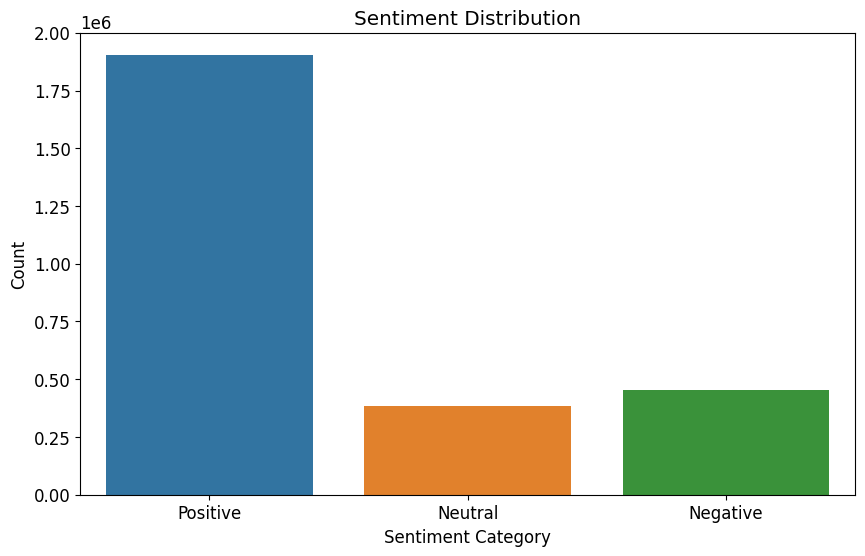

In [7]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='sentiment_category', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
# Assuming merged_data is already loaded as a DataFrame
# Replace 'your_dataset.csv' with your dataset file
# merged_data = pd.read_csv('your_dataset.csv')

# Extract the 'text' column and preprocess
reviews = merged_data['text'].astype(str)
labels = merged_data['sentiment_category']  

# Step 2: Preprocessing the Text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing whitespace
    return text

reviews = reviews.apply(clean_text)

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Step 3: Tokenization and Padding
max_vocab_size = 1000  # Maximum number of words to keep in the tokenizer
max_sequence_length = 100  # Instead of 1000

tokenizer = Tokenizer(num_words=max_vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(reviews)

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, encoded_labels, test_size=0.2, random_state=42
)

# Step 5: Create the Model
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    SpatialDropout1D(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 output classes: positive, neutral, negative
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Step 6: Train the Model
batch_size = 64
epochs = 5

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

# Step 7: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 8: Predict Sentiments for New Reviews
new_reviews = ["This product is amazing!", "Terrible quality, not recommended.", "It's okay, but not great."]
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_padded = pad_sequences(new_sequences, maxlen=max_sequence_length, padding='post')
predictions = model.predict(new_padded)

for review, pred in zip(new_reviews, predictions):
    sentiment = label_encoder.inverse_transform([np.argmax(pred)])[0]
    print(f"Review: {review} -> Sentiment: {sentiment}")


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
34282/34282 ━━━━━━━━━━━━━━━━━━━━ 1916s 56ms/step - accuracy: 0.8098 - loss: 0.5217 - val_accuracy: 0.9158 - val_loss: 0.2385
Epoch 2/5
34282/34282 ━━━━━━━━━━━━━━━━━━━━ 2457s 72ms/step - accuracy: 0.9136 - loss: 0.2501 - val_accuracy: 0.9175 - val_loss: 0.2304
Epoch 3/5
21661/34282 ━━━━━━━━━━━━━━━━━━━━ 8:25 40ms/step - accuracy: 0.9151 - loss: 0.2422

# Sentiment distribution for top 12 products (with the highest reviews)

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

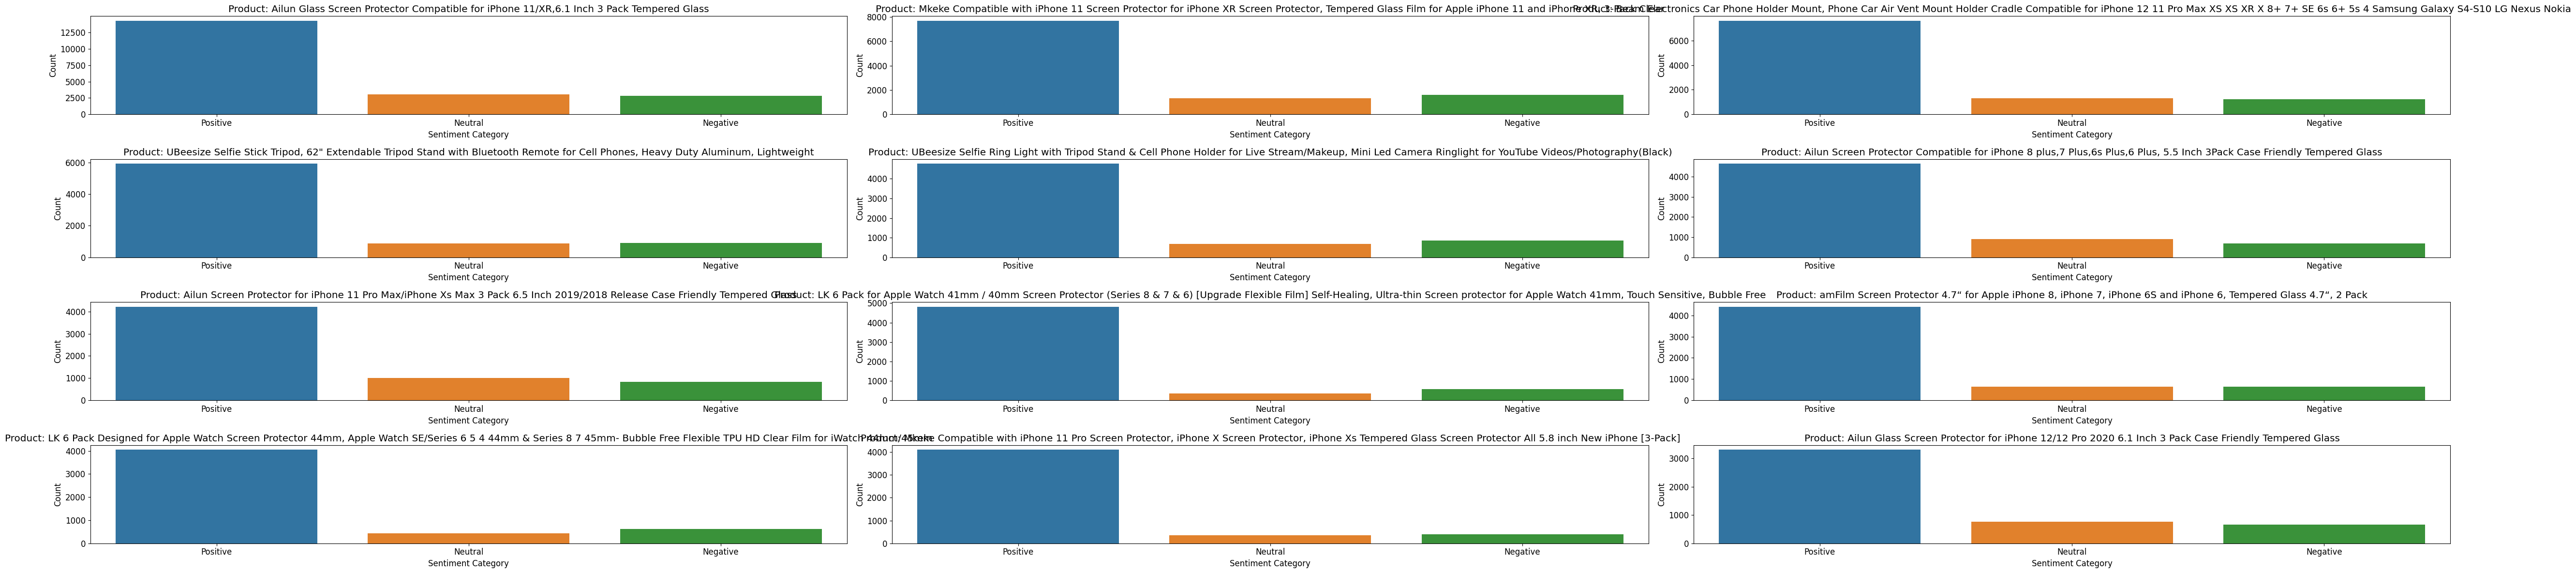

In [10]:
# Group data by 'parent_asin'
grouped_data = merged_data.groupby('parent_asin')

# Function to plot sentiment distribution for multiple products using subplots
def plot_sentiment_distributions(products, metadata, n_per_row=3):
    n_products = len(products)
    n_rows = (n_products // n_per_row) + (n_products % n_per_row > 0)
    
    fig, axes = plt.subplots(n_rows, n_per_row, figsize=(50, n_rows * 3))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    for i, product_asin in enumerate(products):
        product_data = merged_data[merged_data['parent_asin'] == product_asin]
        product_title = metadata.loc[metadata['parent_asin'] == product_asin, 'title'].values[0] if not metadata.empty else product_asin
        
        sns.countplot(data=product_data, x='sentiment_category', order=['Positive', 'Neutral', 'Negative'], ax=axes[i])
        axes[i].set_title(f'Product: {product_title}')
        axes[i].set_xlabel('Sentiment Category')
        axes[i].set_ylabel('Count')
    
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

top_products = merged_data['parent_asin'].value_counts().head(12).index
plot_sentiment_distributions(top_products, metadata)

# Word Cloud for Positive and Negative Reviews

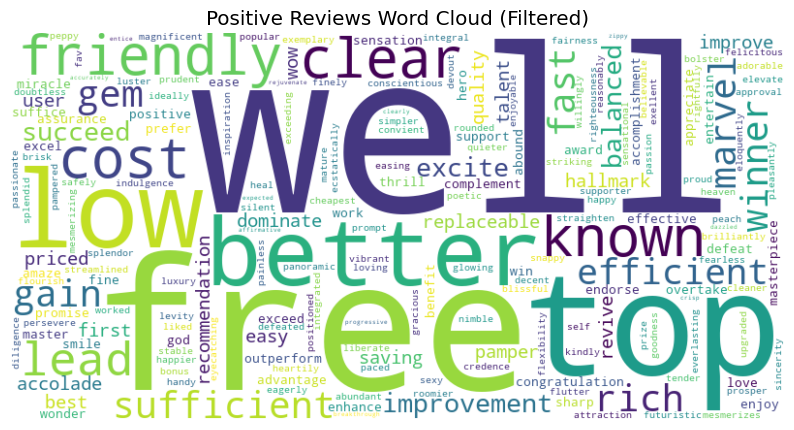

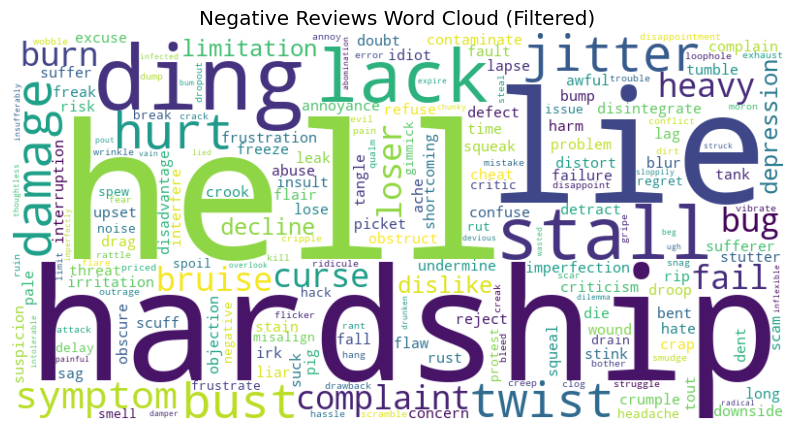

In [11]:
# Get a list of positive and negative words from the lexicon
positive_words_set = set(opinion_lexicon.positive())
negative_words_set = set(opinion_lexicon.negative())

def filter_positive_words(text):
    """Filter only unique positive words from the text."""
    words = text.split()
    unique_positive_words = {word.lower() for word in words if word.lower() in positive_words_set}
    return " ".join(unique_positive_words)

def filter_negative_words(text):
    """Filter only unique negative words from the text."""
    words = text.split()
    unique_negative_words = {word.lower() for word in words if word.lower() in negative_words_set}
    return " ".join(unique_negative_words)

def plot_wordcloud_filtered(data, sentiment_category, filter_positive=False, filter_negative=False):
    """Generate a word cloud for the specified sentiment category with unique words."""
    text = " ".join(data[data['sentiment_category'] == sentiment_category]['text'].fillna(""))
    if filter_positive:
        text = filter_positive_words(text)  # Filter for positive words
    if filter_negative:
        text = filter_negative_words(text)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{sentiment_category} Reviews Word Cloud (Filtered)' if filter_positive or filter_negative else f'{sentiment_category} Reviews Word Cloud')
    plt.show()

# Example Usage
plot_wordcloud_filtered(merged_data, 'Positive', filter_positive=True)  # Unique Positive words only
plot_wordcloud_filtered(merged_data, 'Negative', filter_negative=True)  # Unique Negative words only


# Top 10 Products with the most Negative Reviews

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10048\3581538710.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby(['parent_asin', 'sentiment_category'])


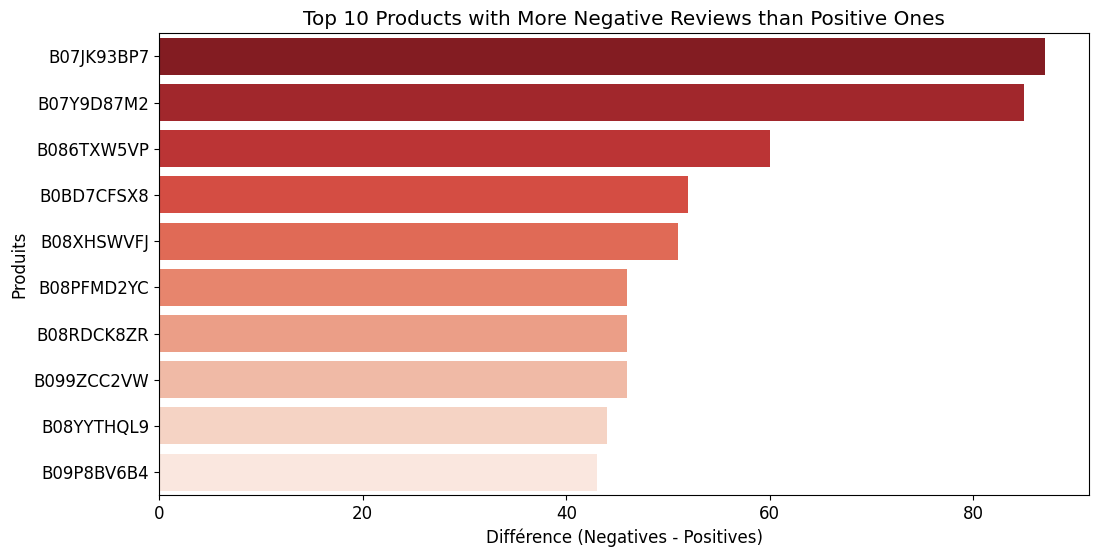

In [10]:
sentiment_counts = (
    merged_data.groupby(['parent_asin', 'sentiment_category'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

sentiment_counts['negative_more_than_positive'] = (
    sentiment_counts.get('Negative', 0) - sentiment_counts.get('Positive', 0)
)

top_negative_products = (
    sentiment_counts.sort_values(by='negative_more_than_positive', ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_negative_products,
    x='negative_more_than_positive',
    y='parent_asin',
    palette='Reds_r',
)
plt.title('Top 10 Products with More Negative Reviews than Positive Ones')
plt.xlabel('Différence (Negatives - Positives)')
plt.ylabel('Produits')
plt.show()

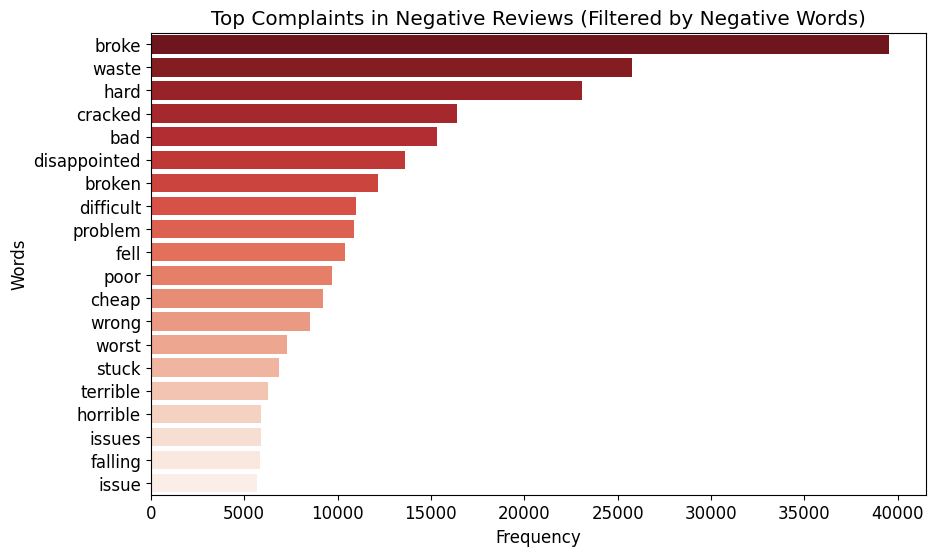

In [14]:
# Get a list of negative words from the lexicon
negative_words_set = set(opinion_lexicon.negative())

def filter_negative_words(text):
    """Filter only negative words from the text."""
    words = text.split()
    return [word.lower() for word in words if word.lower() in negative_words_set]

# Filter words to include only those with negative meanings
text = " ".join(merged_data[merged_data['sentiment_category'] == "Negative"]['text'].fillna(""))
filtered_words = filter_negative_words(text)

# Count the frequency of negative words
if filtered_words:
    word_counts = Counter(filtered_words)
    word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
    
    # Plot the top complaints with negative meanings
    plt.figure(figsize=(10, 6))
    sns.barplot(data=word_freq_df.head(20), x='frequency', y='word', palette='Reds_r')
    plt.title('Top Complaints in Negative Reviews (Filtered by Negative Words)')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()
else:
    print("No negative words found in the dataset.")

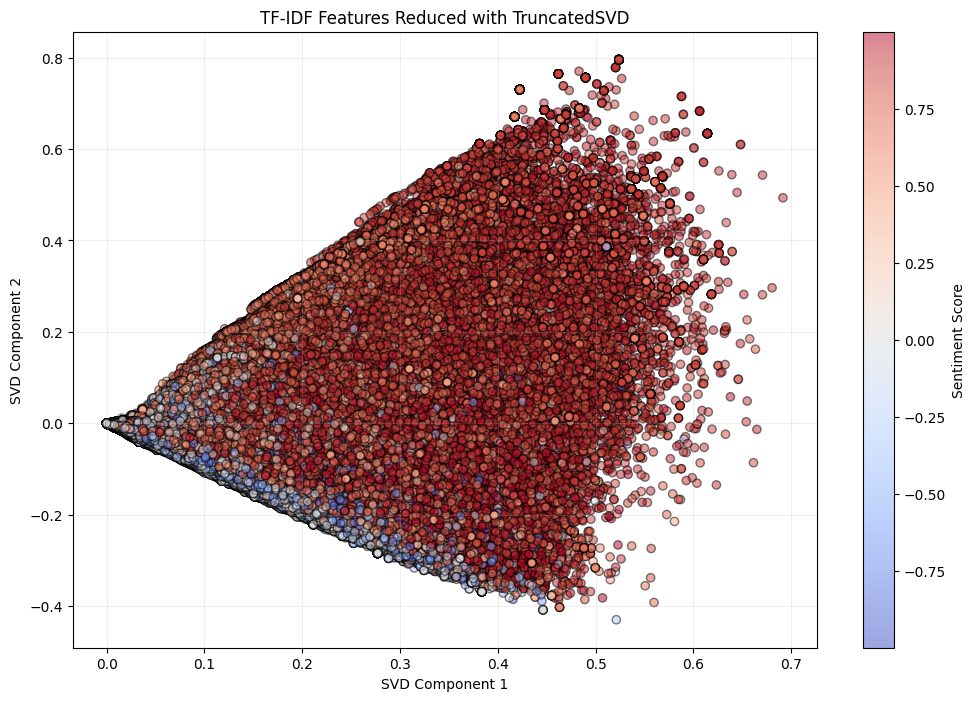

In [12]:
from sklearn.decomposition import TruncatedSVD

# Dimensionality Reduction with TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
reduced_tfidf = svd.fit_transform(tfidf_matrix)

# Scatter Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    reduced_tfidf[:, 0], reduced_tfidf[:, 1],
    c=merged_data['sentiment_score'], cmap='coolwarm', alpha=0.5, edgecolors='k'
)
plt.colorbar(scatter, label='Sentiment Score')
plt.title('TF-IDF Features Reduced with TruncatedSVD')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.grid(alpha=0.2)
plt.show()
